# Import data

In [116]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('csv_files/training_data_clean')

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,year,month
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2011,3
1,8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,True,GeoData Consultants Ltd,Other,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2013,3
2,34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,2013,2
3,67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,2013,1
4,19728,0.0,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,VWC,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2011,7


# Create dummy varaibles

In [5]:
for col in df.columns:
    print('______________')
    print(col)
    print('unique values',len(set(df[col])), '\n')
    print(df[col].value_counts().head())
    print('______________')

______________
id
unique values 59029 

2047     1
45699    1
43648    1
70263    1
72310    1
Name: id, dtype: int64
______________
______________
amount_tsh
unique values 98 

0.0       41268
500.0      3102
50.0       2472
1000.0     1488
20.0       1463
Name: amount_tsh, dtype: int64
______________
______________
funder
unique values 1894 

Government Of Tanzania    12649
Danida                     3114
Hesawa                     2200
Rwssp                      1374
Kkkt                       1286
Name: funder, dtype: int64
______________
______________
gps_height
unique values 2428 

 0     20077
-15       60
-16       55
-13       55
-20       52
Name: gps_height, dtype: int64
______________
______________
installer
unique values 2134 

DWE           21016
Government     1825
RWE            1205
DANIDA         1050
KKKT            898
Name: installer, dtype: int64
______________
______________
longitude
unique values 57145 

0.000000     1812
37.252194       2
37.540901       2
3

In [26]:
# >= 8 unique values
large_catagoricals = ['funder', 'installer', 'wpt_name', 'subvillage', 
                      'region', 'region_code', 'district_code', 'lga', 'ward', 
                      'scheme_management', 'extraction_type', 
                      'extraction_type_group', 'management', 'water_quality', 
                      'source', ]
# < 8
small_catagoricals = ['basin', 'public_meeting', 'recorded_by', 'permit',
                      'extraction_type_class', 'management_group', 'payment',
                      'payment_type', 'quality_group', 'quantity', 'quantity_group', 
                      'source_type', 'source_class', 'waterpoint_type', 
                      'waterpoint_type_group',]

other = ['construction_year', 'year', 'month', 'longitude', 'latitude', 
         'num_private', 'population']

In [7]:
def make_dummy(col):
    top_5_values = df[col].value_counts()[:5]
    other_values = df[col].value_counts()[5:]
    
    for name in top_5_values.keys():
        df.loc[df[col] == name, f'{col}: {name}'] =1
        
    for name in other_values.keys():
        df.loc[df[col] == name, f'{col}: other'] =1
    
    df.drop(col, axis=1, inplace=True)

In [10]:
for title in large_catagoricals:
    make_dummy(title)

In [14]:
df.to_csv('csv_files/training_data_dummies')

In [23]:
df = pd.read_csv('csv_files/training_data_dummies')

In [24]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [25]:
df2 = df

In [27]:
for name in small_catagoricals:
    dummies = pd.get_dummies(df2[name], prefix=name)
    df2 = pd.concat([df2, dummies], axis =1)
    df2.drop(name, axis=1, inplace=True)

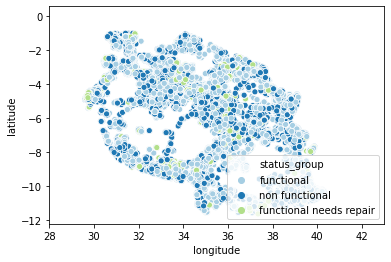

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='longitude', y='latitude', hue='status_group', data=df2, palette='Paired');
plt.xlim(28, 43)
plt.show()



In [29]:
df2.loc[(df2['latitude'] >= -6) & (df2['longitude'] <= 35), 'NW'] =1

df2.loc[(df2['latitude'] >= -6) & (df2['longitude'] > 35), 'NE'] =1

df2.loc[(df2['latitude'] < -6) & (df2['longitude'] <= 35), 'SW'] =1

df2.loc[(df2['latitude'] < -6) & (df2['longitude'] > 35), 'SE'] =1

df2.drop(['longitude', 'latitude'], axis=1, inplace=True)

In [30]:
df2 = df2.fillna(0)

In [31]:
set(df2['status_group'])

{'functional', 'functional needs repair', 'non functional'}

In [32]:
df2['status_group'] = df2['status_group'].replace(['functional', 'functional needs repair'], 1)

In [33]:
df2['status_group'] = df2['status_group'].replace(['non functional'], 0)

In [34]:
df2.head()

,id,amount_tsh,gps_height,num_private,population,construction_year,status_group,year,month,funder: Government Of Tanzania,funder: Danida,funder: Hesawa,funder: Rwssp,funder: Kkkt,funder: other,installer: DWE,installer: Government,installer: RWE,installer: DANIDA,installer: KKKT,installer: other,wpt_name: none,wpt_name: Shuleni,wpt_name: Zahanati,wpt_name: Msikitini,wpt_name: Kanisani,wpt_name: other,subvillage: Madukani,subvillage: Shuleni,subvillage: Majengo,subvillage: Kati,subvillage: Mtakuja,subvillage: other,region: Iringa,region: Shinyanga,region: Mbeya,region: Kilimanjaro,region: Morogoro,region: other,region_code: 11,region_code: 17,region_code: 12,region_code: 3,region_code: 5,region_code: other,district_code: 1,district_code: 2,district_code: 3,district_code: 4,district_code: 5,district_code: other,lga: Njombe,lga: Arusha Rural,lga: Moshi Rural,lga: Bariadi,lga: Rungwe,lga: other,ward: Igosi,ward: Imalinyi,ward: Siha Kati,ward: Mdandu,ward: Nduruma,ward: other,scheme_management: VWC,scheme_management: WUG,scheme_management: Water authority,scheme_management: WUA,scheme_management: Water Board,scheme_management: other,extraction_type: gravity,extraction_type: nira/tanira,extraction_type: other,extraction_type: submersible,extraction_type: swn 80,extraction_type_group: gravity,extraction_type_group: nira/tanira,extraction_type_group: other,extraction_type_group: submersible,extraction_type_group: swn 80,management: vwc,management: wug,management: water board,management: wua,management: private operator,management: other,water_quality: soft,water_quality: salty,water_quality: unknown,water_quality: milky,water_quality: coloured,water_quality: other,source: spring,source: shallow well,source: machine dbh,source: river,source: rainwater harvesting,source: other,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,public_meeting_False,public_meeting_True,recorded_by_GeoData Consultants Ltd,permit_False,permit_True,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,management_group_commercial,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,payment_never pay,payment_other,payment_pay annually,payment_pay monthly,payment_pay per bucket,payment_pay when scheme fails,payment_unknown,payment_type_annually,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,quality_group_colored,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,quantity_group_dry,quantity_group_enough,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,source_type_borehole,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other,NW,NE,SW,SE
0,69572,6000.0,1390,0,109,1999,1,2011,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0

# Logistic Regression

In [35]:
X = df2.drop(['status_group','recorded_by_GeoData Consultants Ltd'], axis = 1)
y = df2['status_group']

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [51]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()


X_train_minmax = mmscaler.fit_transform(X_train)
X_test_minmax = mmscaler.transform(X_test)

In [46]:
#df2['recorded_by_GeoData Consultants Ltd']

In [84]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train_minmax, y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
y_hat_test = logreg.predict(X_test_minmax)
y_hat_train = logreg.predict(X_train_minmax)

In [109]:
from sklearn.metrics import roc_curve, auc

y_score = logreg.fit(X_train_minmax, y_train).decision_function(X_test_minmax)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [110]:
from sklearn.metrics import classification_report


target_names = ['non functional', 'functional']

print('Test data')
print(classification_report(y_test, y_hat_test, target_names= target_names))
print('AUC: {}'.format(auc(fpr, tpr)))


Test data
                precision    recall  f1-score   support

non functional       0.99      0.03      0.05      5664
    functional       0.62      1.00      0.77      9094

      accuracy                           0.63     14758
     macro avg       0.81      0.51      0.41     14758
  weighted avg       0.76      0.63      0.49     14758

AUC: 0.8166436529517819


In [88]:
from sklearn.metrics import confusion_matrix


cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[3336 2328]
 [ 779 8315]]


In [105]:
y_train.value_counts()

1    27276
0    16995
Name: status_group, dtype: int64

In [113]:
weights = [None, 'balanced', {1:2, 0:1}, {1:10, 0:1}, {1:100, 0:1}, {1:1000, 0:1}]
names = ['None', 'Balanced', '2 to 1', '10 to 1', '100 to 1', '1000 to 1']


for n, weight in enumerate(weights):
    # Fit a model
    logreg = LogisticRegression(fit_intercept=False, C=1e20, class_weight=weight, solver='lbfgs')
    model_log = logreg.fit(X_train_minmax, y_train)
    print(model_log)

    # Predict
    y_hat_test = logreg.predict(X_test_minmax)

    y_score = logreg.fit(X_train_minmax, y_train).decision_function(X_test_minmax)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('-------------------------------------------------------------------------------------')

LogisticRegression(C=1e+20, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
AUC for None: 0.8401700801670935
-------------------------------------------------------------------------------------
LogisticRegression(C=1e+20, class_weight='balanced', dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
AUC for Balanced: 0.8404873681225219
-------------------------------------------------------------------------------------
LogisticRegression(C=1e+20, class_weight={0: 1, 1: 2}, dual=False,
                   fit_inte

In [117]:
from imblearn.over_sampling import SMOTE

ImportError: cannot import name '_to_object_array'